In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
im
pimport matplotlib.pyplot as plto

In [2]:
inputs = keras.Input(shape=(784,))
inputs.shape

TensorShape([None, 784])

In [3]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()


Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

plt.clf()
plt.title('See Data')
plt.plot(x_train,y_train, 'b.', label='Training')
plt.plot(x_test,y_test, 'r.', label='Test')
plt.draw()

#plt.legend()
#plt.show(block=False)   #this creates an empty frozen window.



Error in callback <function flush_figures at 0x000001664EED84C0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

<function matplotlib.pyplot.show(close=None, block=None)>

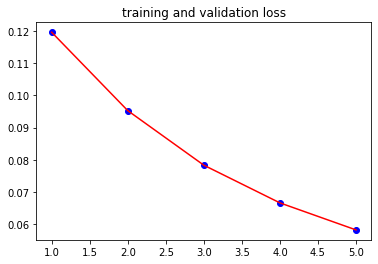

In [16]:
#plot training history
loss = history.history['loss']


epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend
plt.show

In [17]:
predictions = model.predict(x_test)